In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold

from nltk.tokenize import word_tokenize
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download('punkt')

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

!pip3 install cltk
import cltk
from cltk.tokenize.sentence import TokenizeSentence
from cltk.stop.classical_hindi.stops import STOPS_LIST

!pip3 install stanza
import stanza
stanza.download('hi')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 634kB 8.5MB/s 
     |████████████████████████████████| 163kB 16.9MB/s 
     |████████████████████████████████| 747kB 17.0MB/s 
     |████████████████████████████████| 1.5MB 32.8MB/s 
     |████████████████████████████████| 471kB 43.9MB/s 
     |████████████████████████████████| 71kB 11.6MB/s 
  Created wheel for cltk: filename=cltk-0.1.121-cp36-none-any.whl size=711645 sha256=3afe16f2988b0936e3c86562035af4ed2588b063408ce6590158d3eea0d3a3e6
  Stored in directory: /root/.cache/pip/wheels/03/c9/6b/e60acb6f511ebe008f3e961e894d57598517b25c4cbffbb70f
Successfully built cltk
     |████████████████████████████████| 235kB 8.5MB/s 


2020-11-29 10:48:07 INFO: Downloading default packages for language: hi (Hindi)...
2020-11-29 10:48:16 INFO: Finished downloading models and saved to /root/stanza_resources.


In [ ]:
input_path = "/content/drive/My Drive/Colab Notebooks (1)/cod/data/all_classes_data.txt"
input_path2 = "/content/drive/My Drive/Colab Notebooks (1)/cod/data/all_classes_data2.txt"
input_path3 = "/content/drive/MyDrive/Colab Notebooks (1)/cod/data/new_data_labels.csv"
stopwords_path = "/content/drive/My Drive/Colab Notebooks (1)/cod/data/stopwords.txt"

entire_data_path = "/content/drive/My Drive/Colab Notebooks (1)/cod/data/processed.csv"

In [ ]:
df = pd.read_csv(entire_data_path, encoding='utf8')
df

,Unnamed: 0,Unnamed: 0.1,sentence,label,Unnamed: 3,agriculture,community_groups,consumer_issues,culture_&_entertainment,education,employment,environment,governance,health,industry,infrastructure_services,livelihood,local_news,migration,nan,prices_inequality,social_issues,processed_sen,removed_loc,remove_loc_name,removed_loc_name
0,0,1,$10 कीमत वाली मोबाइल वाली से पूरे बिहार में आज...,"employment, governance, governance,",0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,$10 कीमत वाली मोबाइल वाली से पूरे में आज हरताल...,$10 कीमत वाली मोबाइल वाली से पूरे में आज हरताल...,NaN,$10 कीमत वाली मोबाइल वाली से पूरे में आज हरताल...
1,1,2,* * *,"local_news,",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,* * *,* * *,NaN,* * *
2,2,3,* * * * * * * * *,"livelihood, social_issues,",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,* * * * * * * * *,* * * * * * * * *,NaN,* * * * * * * * *
3,3,4,* चमारी के बोल रहे गाना गा रहे हैं मैं जिस दिन...,culture_&_entertainment,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,* चमारी के बोल रहे गाना गा रहे हैं मैं जिस दिन...,* चमारी के बोल रहे गाना गा रहे हैं मैं जिस दिन...,NaN,* चमारी के बोल रहे गाना गा रहे हैं मैं जिस दिन...
4,4,5,1 किलोमीटर आगे मत सेंड कर रही हूं यहां पर इंजी...,"infrastructure_services, education,",0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1 किलोमीटर आगे मत सेंड कर रही हूं यहां पर इंजी...,1 किलोमीटर आगे मत सेंड कर रही हूं यहां पर इंजी...,NaN,1 किलोमीटर आगे मत सेंड कर रही हूं यहां पर इंजी...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22422,22422,22423,होली होली होली होली बगीचे में घूमने का मजा ही...,culture_&_entertainment,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,होली होली होली होली बगीचे में घूमने का मजा ही ...,NaN,होली होली होली होली बगीचे में घूमने का मजा ही ...
22423,22423,22424,होली होली होली होली रे होली क्यों नहीं आ सकती...,culture_&_entertainment,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,होली होली होली होली रे होली क्यों नहीं आ सकती...,NaN,होली होली होली होली रे होली क्यों नहीं आ सकती ...
22424,22424,22425,हौंडा यूनिकॉर्न कोरिया और जल्दी रिकॉर्डिंग भेज...,"culture_&_entertainment,",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,हौंडा यूनिकॉर्न और जल्दी रिकॉर्डिंग भेज दी गई है,NaN,हौंडा यूनिकॉर्न और जल्दी रिकॉर्डिंग भेज दी गई है
22425,22425,22426,₹1 तक की कहानियां सुना रहे हैं मुझे बहुत अच्छा...,"culture_&_entertainment,",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,₹1 तक की कहानियां सुना रहे हैं मुझे बहुत अच्छा...,NaN,₹1 तक की कहानियां सुना रहे हैं मुझे बहुत अच्छा...


In [ ]:
df['stop_word_removal'] = ''

In [ ]:
for ind in df.index:
    sen = df['removed_loc_name'][ind]
    new_sen = sen
    try:
        new_sen = [w for w in sen.split() if w not in STOPS_LIST]
        new_sen = ' '.join(new_sen)
        # df['stop_word_removal'][ind] = new_sen
        # print(ind)
        # print(new_sen)
        # print(sen)
        # print()
    except Exception as e:
        print(e)
        print(ind)
        print()
    
    df['stop_word_removal'][ind] = new_sen
    # break

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


'float' object has no attribute 'split'
145

'float' object has no attribute 'split'
377

'float' object has no attribute 'split'
1712

'float' object has no attribute 'split'
3100

'float' object has no attribute 'split'
11240

'float' object has no attribute 'split'
13480

'float' object has no attribute 'split'
14272

'float' object has no attribute 'split'
18957

'float' object has no attribute 'split'
19440

'float' object has no attribute 'split'
20081

'float' object has no attribute 'split'
20298



In [ ]:
df = df[df['label'].notnull()]
df = df[df['stop_word_removal'].notnull()]
df = df.reset_index()
df

,index,Unnamed: 0,Unnamed: 0.1,sentence,label,Unnamed: 3,agriculture,community_groups,consumer_issues,culture_&_entertainment,education,employment,environment,governance,health,industry,infrastructure_services,livelihood,local_news,migration,nan,prices_inequality,social_issues,processed_sen,removed_loc,remove_loc_name,removed_loc_name,stop_word_removal
0,0,0,1,$10 कीमत वाली मोबाइल वाली से पूरे बिहार में आज...,"employment, governance, governance,",0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,$10 कीमत वाली मोबाइल वाली से पूरे में आज हरताल...,$10 कीमत वाली मोबाइल वाली से पूरे में आज हरताल...,NaN,$10 कीमत वाली मोबाइल वाली से पूरे में आज हरताल...,$10 कीमत वाली मोबाइल वाली पूरे आज हरतालिका तीज...
1,1,1,2,* * *,"local_news,",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,* * *,* * *,NaN,* * *,* * *
2,2,2,3,* * * * * * * * *,"livelihood, social_issues,",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,* * * * * * * * *,* * * * * * * * *,NaN,* * * * * * * * *,* * * * * * * * *
3,3,3,4,* चमारी के बोल रहे गाना गा रहे हैं मैं जिस दिन...,culture_&_entertainment,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,* चमारी के बोल रहे गाना गा रहे हैं मैं जिस दिन...,* चमारी के बोल रहे गाना गा रहे हैं मैं जिस दिन...,NaN,* चमारी के बोल रहे गाना गा रहे हैं मैं जिस दिन...,* चमारी बोल गाना गा मैं दिन तेरे प्यार दिल वो ...
4,4,4,5,1 किलोमीटर आगे मत सेंड कर रही हूं यहां पर इंजी...,"infrastructure_services, education,",0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1 किलोमीटर आगे मत सेंड कर रही हूं यहां पर इंजी...,1 किलोमीटर आगे मत सेंड कर रही हूं यहां पर इंजी...,NaN,1 किलोमीटर आगे मत सेंड कर रही हूं यहां पर इंजी...,1 किलोमीटर आगे मत सेंड कर रही हूं यहां इंजीनिय...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22227,22422,22422,22423,होली होली होली होली बगीचे में घूमने का मजा ही...,culture_&_entertainment,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,होली होली होली होली बगीचे में घूमने का मजा ही ...,NaN,होली होली होली होली बगीचे में घूमने का मजा ही ...,होली होली होली होली बगीचे घूमने मजा यहां कितना...
22228,22423,22423,22424,होली होली होली होली रे होली क्यों नहीं आ सकती...,culture_&_entertainment,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,होली होली होली होली रे होली क्यों नहीं आ सकती...,NaN,होली होली होली होली रे होली क्यों नहीं आ सकती ...,होली होली होली होली रे होली क्यों आ सकती बिल्क...
22229,22424,22424,22425,हौंडा यूनिकॉर्न कोरिया और जल्दी रिकॉर्डिंग भेज...,"culture_&_entertainment,",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,हौंडा यूनिकॉर्न और जल्दी रिकॉर्डिंग भेज दी गई है,NaN,हौंडा यूनिकॉर्न और जल्दी रिकॉर्डिंग भेज दी गई है,हौंडा यूनिकॉर्न जल्दी रिकॉर्डिंग भेज दी गई
22230,22425,22425,22426,₹1 तक की कहानियां सुना रहे हैं मुझे बहुत अच्छा...,"culture_&_entertainment,",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,₹1 तक की कहानियां सुना रहे हैं मुझे बहुत अच्छा...,NaN,₹1 तक की कहानियां सुना रहे हैं मुझे बहुत अच्छा...,₹1 तक कहानियां सुना मुझे बहुत अच्छा लगा क्यों ...


In [ ]:
main_tags = ['local_news','health','education','employment', 'prices_inequality', 'industry','migration', 'infrastructure_services', 'consumer_issues', 'culture_&_entertainment', 'environment','agriculture','livelihood', 'social_issues', 'governance','community_groups' ]

In [ ]:
count = [df[x].sum() for x in main_tags]
count = pd.DataFrame(count, index=main_tags)

In [ ]:
count

,0
local_news,4908
health,5150
education,3312
employment,1098
prices_inequality,1085
industry,244
migration,195
infrastructure_services,3143
consumer_issues,289
culture_&_entertainment,5272


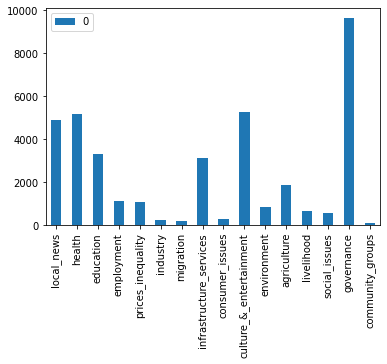

In [ ]:
count.plot.bar()

In [ ]:
df

,index,Unnamed: 0,Unnamed: 0.1,sentence,label,Unnamed: 3,agriculture,community_groups,consumer_issues,culture_&_entertainment,education,employment,environment,governance,health,industry,infrastructure_services,livelihood,local_news,migration,nan,prices_inequality,social_issues,processed_sen,removed_loc,remove_loc_name,removed_loc_name,stop_word_removal
0,0,0,1,$10 कीमत वाली मोबाइल वाली से पूरे बिहार में आज...,"employment, governance, governance,",0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,$10 कीमत वाली मोबाइल वाली से पूरे में आज हरताल...,$10 कीमत वाली मोबाइल वाली से पूरे में आज हरताल...,NaN,$10 कीमत वाली मोबाइल वाली से पूरे में आज हरताल...,$10 कीमत वाली मोबाइल वाली पूरे आज हरतालिका तीज...
1,1,1,2,* * *,"local_news,",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,* * *,* * *,NaN,* * *,* * *
2,2,2,3,* * * * * * * * *,"livelihood, social_issues,",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,* * * * * * * * *,* * * * * * * * *,NaN,* * * * * * * * *,* * * * * * * * *
3,3,3,4,* चमारी के बोल रहे गाना गा रहे हैं मैं जिस दिन...,culture_&_entertainment,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,* चमारी के बोल रहे गाना गा रहे हैं मैं जिस दिन...,* चमारी के बोल रहे गाना गा रहे हैं मैं जिस दिन...,NaN,* चमारी के बोल रहे गाना गा रहे हैं मैं जिस दिन...,* चमारी बोल गाना गा मैं दिन तेरे प्यार दिल वो ...
4,4,4,5,1 किलोमीटर आगे मत सेंड कर रही हूं यहां पर इंजी...,"infrastructure_services, education,",0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1 किलोमीटर आगे मत सेंड कर रही हूं यहां पर इंजी...,1 किलोमीटर आगे मत सेंड कर रही हूं यहां पर इंजी...,NaN,1 किलोमीटर आगे मत सेंड कर रही हूं यहां पर इंजी...,1 किलोमीटर आगे मत सेंड कर रही हूं यहां इंजीनिय...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22227,22422,22422,22423,होली होली होली होली बगीचे में घूमने का मजा ही...,culture_&_entertainment,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,होली होली होली होली बगीचे में घूमने का मजा ही ...,NaN,होली होली होली होली बगीचे में घूमने का मजा ही ...,होली होली होली होली बगीचे घूमने मजा यहां कितना...
22228,22423,22423,22424,होली होली होली होली रे होली क्यों नहीं आ सकती...,culture_&_entertainment,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,होली होली होली होली रे होली क्यों नहीं आ सकती...,NaN,होली होली होली होली रे होली क्यों नहीं आ सकती ...,होली होली होली होली रे होली क्यों आ सकती बिल्क...
22229,22424,22424,22425,हौंडा यूनिकॉर्न कोरिया और जल्दी रिकॉर्डिंग भेज...,"culture_&_entertainment,",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,हौंडा यूनिकॉर्न और जल्दी रिकॉर्डिंग भेज दी गई है,NaN,हौंडा यूनिकॉर्न और जल्दी रिकॉर्डिंग भेज दी गई है,हौंडा यूनिकॉर्न जल्दी रिकॉर्डिंग भेज दी गई
22230,22425,22425,22426,₹1 तक की कहानियां सुना रहे हैं मुझे बहुत अच्छा...,"culture_&_entertainment,",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,₹1 तक की कहानियां सुना रहे हैं मुझे बहुत अच्छा...,NaN,₹1 तक की कहानियां सुना रहे हैं मुझे बहुत अच्छा...,₹1 तक कहानियां सुना मुझे बहुत अच्छा लगा क्यों ...


In [ ]:
sen = ""
for ind in df.index:
    sen+= df['stop_word_removal'][ind]+". "

In [ ]:
print(sen[0:1000])

$10 कीमत वाली मोबाइल वाली पूरे आज हरतालिका तीज सभी नियोजित कल शाम मान लेने बाद दूसरे विभागों देखो नगर निगम निगम माटी मोबाइल. * * *. * * * * * * * * *. * चमारी बोल गाना गा मैं दिन तेरे प्यार दिल वो दिन आखिरी तेरा प्यार दिल वो दिन आखिरी जिंदगी सच मैं दिन भुला दूं तेरा प्यार दिल जिंदगी. 1 किलोमीटर आगे मत सेंड कर रही हूं यहां इंजीनियरिंग कॉलेज मेडिकल कॉलेज टो गेट इनटू पीसी मटन बनाने तैयारी चल रही यहां मेडिकल कॉलेज तथा आधुनिक अस्पताल सरकारी अस्पताल बनाने योजना नियम पिताजी यशवंत सिन्हा सहित जिसे आज पूरा किया जा रहा अन्य अधिकारी बहुत जल्द श्री अमित जाएगी हजारीबाग आज अधूरे घोषित किया जा रहा. 1 जनवरी पाकिस्तान T20 जीते गए जांच अधिकारी सहित लोग उपस्थित. 1 तारीख 8:00 बजे स्कूलों बच्चों स्कूल रखो. 1 दिन 24000 छात्रों जानकारी वीडियो कहा समग्र आईडी पोर्टल छात्रवृत्ति डीईओ ली बैठक नमस्कार दोस्तों मैं बादाम सिंह नियाना नाश्ते जिले 400000 स्कूली छात्र जिनमें 24800 छात्र जिनका रजिस्ट्रेशन समग्र आईडी पोर्टल हुआ छात्र रजिस्टर रजिस्टर्ड डाटा हाईस्कूल एकत्रित करें छोटे भाई शाम तक उपलब्ध कराएं मिल पाने वजह छ

In [ ]:
nlp = stanza.Pipeline('hi')

2020-11-29 10:48:31 INFO: Loading these models for language: hi (Hindi):
| Processor | Package |
-----------------------
| tokenize  | hdtb    |
| pos       | hdtb    |
| lemma     | hdtb    |
| depparse  | hdtb    |

2020-11-29 10:48:31 INFO: Use device: gpu
2020-11-29 10:48:31 INFO: Loading: tokenize
2020-11-29 10:48:42 INFO: Loading: pos
2020-11-29 10:48:43 INFO: Loading: lemma
2020-11-29 10:48:43 INFO: Loading: depparse
2020-11-29 10:48:44 INFO: Done loading processors!


In [ ]:
hindi_sen = nlp(sen)

In [ ]:
path_classes = "/content/drive/MyDrive/Colab Notebooks (1)/cod/data/classes/"

In [ ]:
#making data files for each class
for cls in main_tags:
    df_s = df
    df_s1 = df_s[df_s[cls]==1]

    df_s0 = df_s[df_s[cls]==0]
    df_s0 = df_s0.sample(frac=1)
    df_s0 = df_s0.iloc[:len(df_s1)]

    df_sData = df_s1.append(df_s0)
    df_sData = df_sData.reset_index()

    path = path_classes+cls+".csv"
    df_sData.to_csv(path)

In [ ]:
path = path_classes+"education"+".csv"
df = pd.read_csv(path,encoding='utf8')

In [ ]:
sen = df['stop_word_removal']

In [ ]:
tf_idf_vect = TfidfVectorizer(stop_words=None)
final_tf_idf = tf_idf_vect.fit_transform(sen)
tfidf_feat = tf_idf_vect.get_feature_names()